In [1]:
pip install simpy

In [3]:
import matplotlib.pyplot as plt
import numpy as np

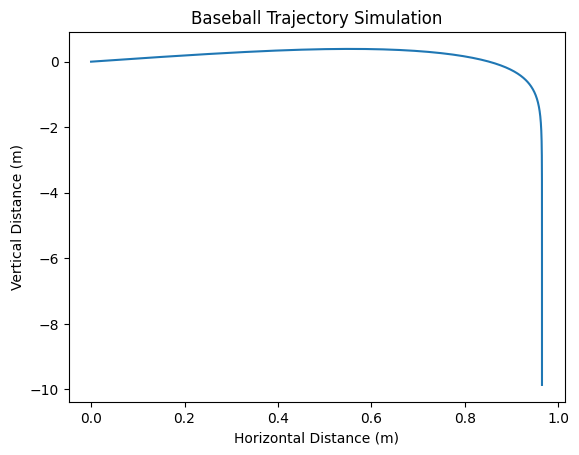

In [4]:
def baseball_simulation(initial_position, initial_velocity, launch_angle, time_step, total_time):
    g = 9.8  # Acceleration due to gravity (m/s^2)
    air_density = 1.225  # Air density at sea level (kg/m^3)
    drag_coefficient = 0.47  # Drag coefficient (for a sphere)
    baseball_mass = 0.145  # Mass of the baseball (kg)

    num_steps = int(total_time / time_step) + 1
    times = np.linspace(0, total_time, num_steps)
    positions = np.zeros((num_steps, 2))
    velocities = np.zeros((num_steps, 2))

    positions[0] = initial_position
    velocities[0] = initial_velocity

    for i in range(1, num_steps):
        # Calculate drag force
        velocity_magnitude = np.linalg.norm(velocities[i - 1])
        drag_force = -0.5 * drag_coefficient * air_density * velocity_magnitude**2 * (velocities[i - 1] / velocity_magnitude)

        # Calculate gravitational force
        gravity_force = np.array([0, -g * baseball_mass])

        # Calculate total force
        total_force = drag_force + gravity_force

        # Update velocity and position using the Euler method
        acceleration = total_force / baseball_mass
        velocities[i] = velocities[i - 1] + acceleration * time_step
        positions[i] = positions[i - 1] + velocities[i] * time_step

    return times, positions

def plot_baseball_simulation(times, positions):
    plt.plot(positions[:, 0], positions[:, 1])
    plt.title('Baseball Trajectory Simulation')
    plt.xlabel('Horizontal Distance (m)')
    plt.ylabel('Vertical Distance (m)')
    plt.show()

def main():
    # Parameters
    initial_position = np.array([0, 0])  # Initial position (m)
    initial_velocity = np.array([40, 40])  # Initial velocity (m/s)
    launch_angle = 45  # Launch angle (degrees)
    time_step = 0.01  # Time step for simulation (s)
    total_time = 5.0  # Total simulation time (s)

    # Convert launch angle to radians
    launch_angle_rad = np.radians(launch_angle)

    # Set initial velocity based on launch angle
    initial_velocity = initial_velocity * np.array([np.cos(launch_angle_rad), np.sin(launch_angle_rad)])

    # Simulate baseball trajectory
    times, positions = baseball_simulation(initial_position, initial_velocity, launch_angle, time_step, total_time)

    # Plot results
    plot_baseball_simulation(times, positions)

if __name__ == '__main__':
    main()